# Chapter 2 - Exploratory Data Analysis and Visualization

In [1]:
# importing libraries
import json
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the json file

In [2]:
with open('dtypes.json', 'r') as jsonfile:
    dtyp = json.load(jsonfile)
dtyp

{'id': 'float',
 'flag_tsunami': 'str',
 'year': 'float',
 'month': 'float',
 'day': 'float',
 'hour': 'float',
 'minute': 'float',
 'second': 'float',
 'focal_depth': 'float',
 'eq_primary': 'float',
 'eq_mag_mw': 'float',
 'eq_mag_ms': 'float',
 'eq_mag_mb': 'float',
 'intensity': 'float',
 'country': 'str',
 'state': 'str',
 'location_name': 'str',
 'latitude': 'float',
 'longitude': 'float',
 'region_code': 'str',
 'injuries': 'float',
 'injuries_description': 'str',
 'damage_millions_dollars': 'float',
 'damage_description': 'str',
 'total_injuries': 'float',
 'total_injuries_description': 'str',
 'total_damage_millions_dollars': 'float',
 'total_damage_description': 'str'}

In [3]:
# importing data
data = pd.read_csv('earthquake_data.csv', dtype=dtyp)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             6072 non-null   float64
 1   flag_tsunami                   6072 non-null   object 
 2   year                           6072 non-null   float64
 3   month                          5667 non-null   float64
 4   day                            5515 non-null   float64
 5   hour                           4044 non-null   float64
 6   minute                         3838 non-null   float64
 7   second                         2721 non-null   float64
 8   focal_depth                    3120 non-null   float64
 9   eq_primary                     4286 non-null   float64
 10  eq_mag_mw                      1216 non-null   float64
 11  eq_mag_ms                      2916 non-null   float64
 12  eq_mag_mb                      1786 non-null   f

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,6072.0,4658.426219,2924.650010,1.000,2142.75000,4608.5,6475.25000,10378.000
year,6072.0,1802.307477,377.924931,-2150.000,1818.00000,1927.0,1986.00000,2018.000
month,5667.0,6.510852,3.450167,1.000,4.00000,7.0,9.00000,12.000
day,5515.0,15.734361,8.752862,1.000,8.00000,16.0,23.00000,31.000
hour,4044.0,11.308605,7.033485,0.000,5.00000,11.0,17.00000,23.000
minute,3838.0,28.855915,17.151545,0.000,14.00000,30.0,44.00000,59.000
second,2721.0,29.740243,17.132196,0.100,14.80000,29.7,44.50000,59.900
focal_depth,3120.0,41.680769,71.258782,0.000,11.00000,26.0,40.00000,675.000
eq_primary,4286.0,6.471419,1.043968,1.600,5.70000,6.5,7.30000,9.500
eq_mag_mw,1216.0,6.526563,0.937869,3.600,5.80000,6.5,7.20000,9.500


### Analysing missing data

In [6]:
total = data.isnull().sum()
percent = data.isnull().mean() * 100
missing_data = pd.concat([total, percent], axis=1, join='outer', keys=['count_missing', 'perc_missing'])

In [7]:
missing_data.sort_values(by='perc_missing', ascending=False, inplace=True)
missing_data

,count_missing,perc_missing
state,5764,94.927536
total_damage_millions_dollars,5654,93.115942
damage_millions_dollars,5594,92.127800
injuries,4903,80.747694
total_injuries,4888,80.500659
eq_mag_mw,4856,79.973650
injuries_description,4723,77.783267
total_injuries_description,4715,77.651515
eq_mag_mb,4286,70.586298
second,3351,55.187747


### using the missingno library to plot the nullity matrix for a random sample of 500 data points
black lines represent non-nullity while the white lines indicate the presence of a null value in that column

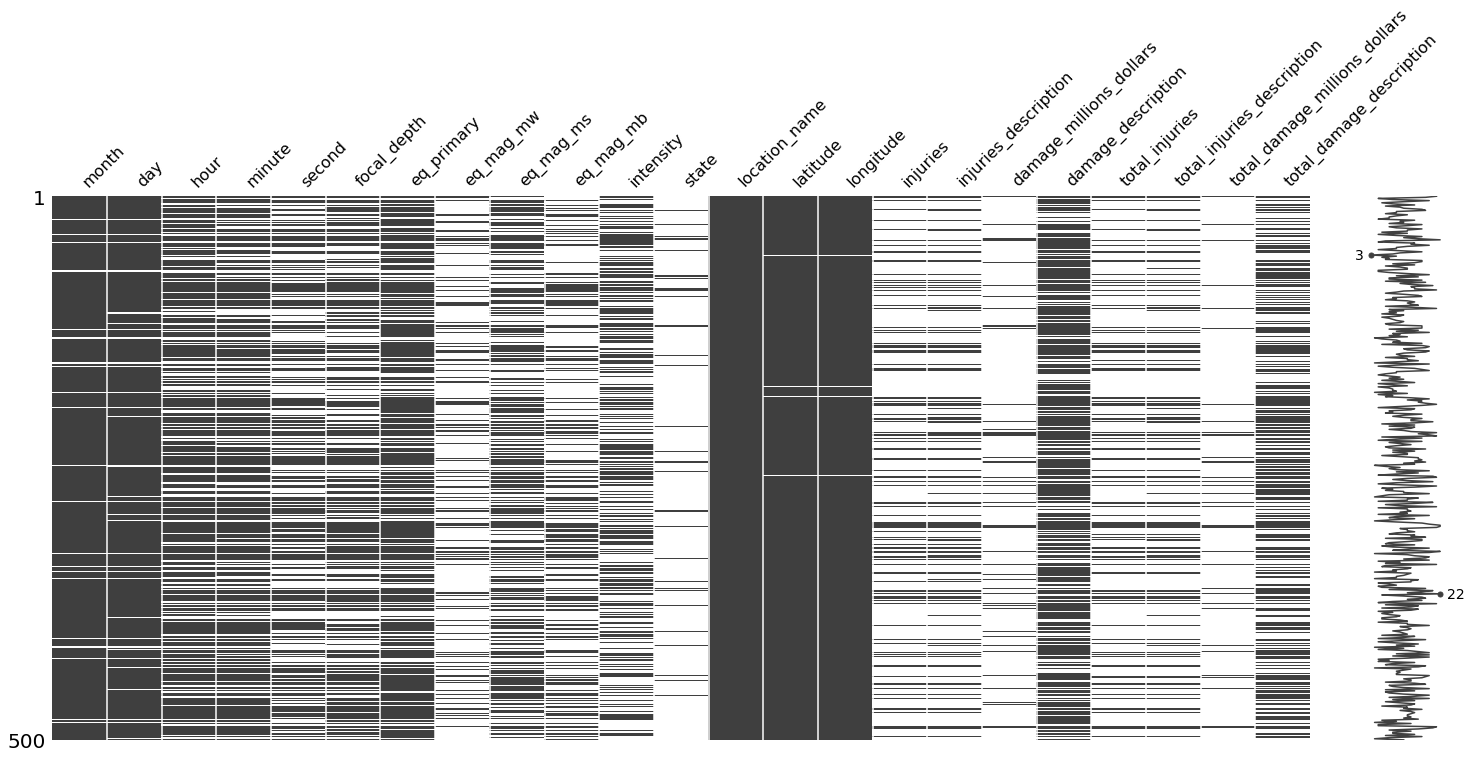

In [8]:
nullable_columns = data.columns[data.isnull().any()].tolist()
msno.matrix(data[nullable_columns].sample(500))
plt.show()

### Ploting the nullity correlation heatmap

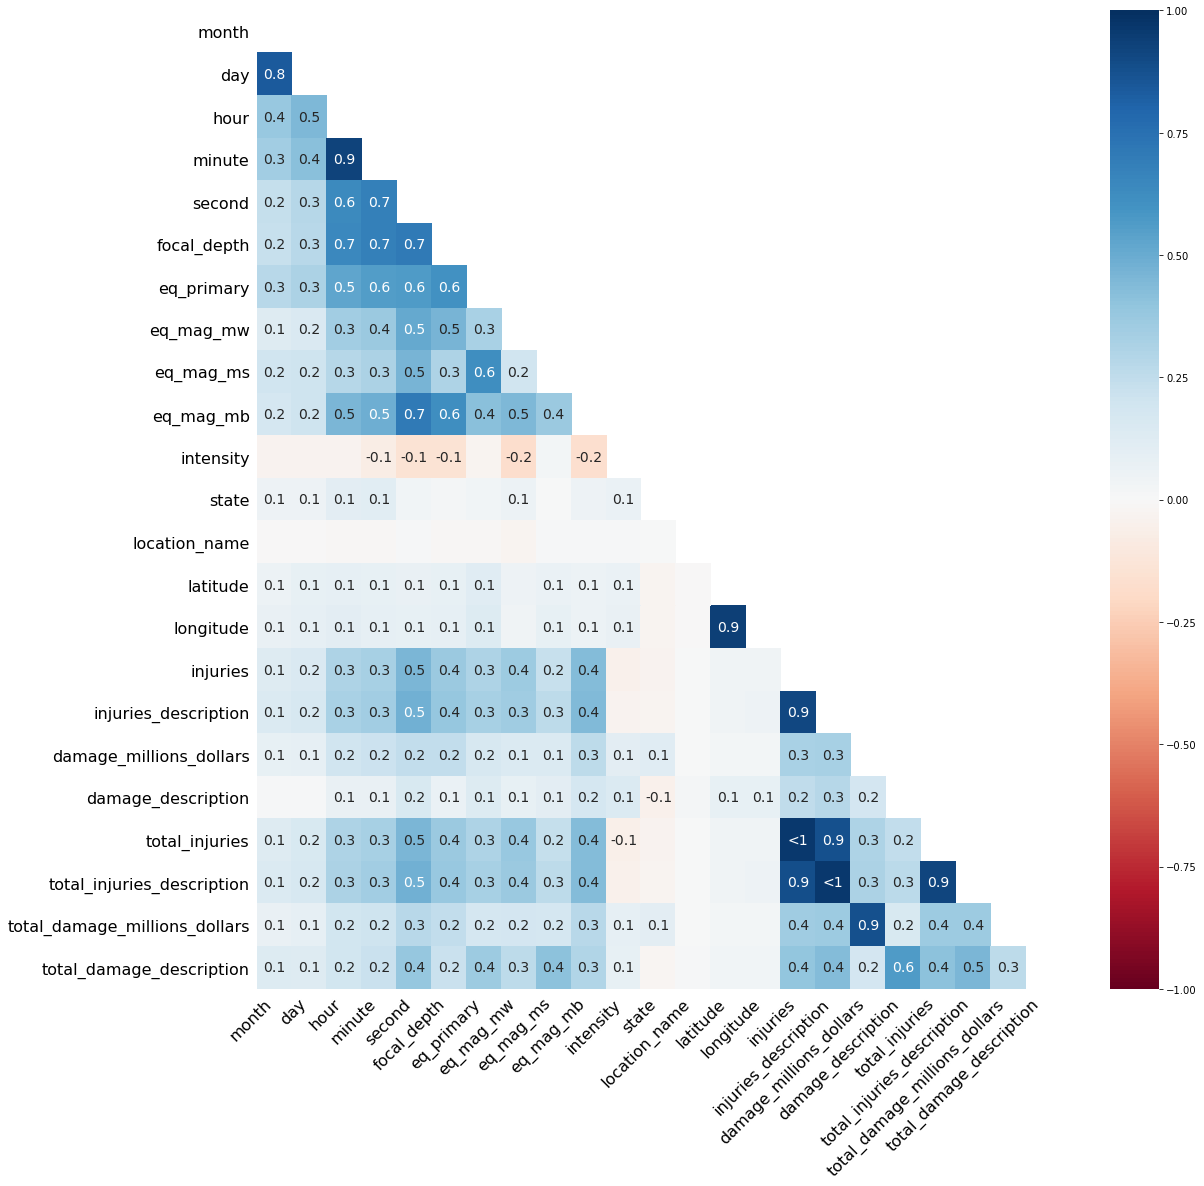

In [9]:
msno.heatmap(data[nullable_columns], figsize=(18,18))
plt.show()

replacing missing values with zeros in time-based features having at least one null value

In [10]:
time_features = ['month', 'day', 'hour', 'minute', 'second']
data[time_features] = data[time_features].fillna(0)

In [11]:
# Use the .info() function to view null value counts for the imputed columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             6072 non-null   float64
 1   flag_tsunami                   6072 non-null   object 
 2   year                           6072 non-null   float64
 3   month                          6072 non-null   float64
 4   day                            6072 non-null   float64
 5   hour                           6072 non-null   float64
 6   minute                         6072 non-null   float64
 7   second                         6072 non-null   float64
 8   focal_depth                    3120 non-null   float64
 9   eq_primary                     4286 non-null   float64
 10  eq_mag_mw                      1216 non-null   float64
 11  eq_mag_ms                      2916 non-null   float64
 12  eq_mag_mb                      1786 non-null   f

### replacing null values in the description-related categorical features using scikit-learn's SimpleImputer

Creating a list containing the names of the columns whose values we want to impute

In [12]:
description_features = ['injuries_description', 'damage_description',
                        'total_injuries_description', 'total_damage_description']

In [13]:
# Create an object of the SimpleImputer class
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')

In [14]:
data[description_features] = imp.fit_transform(data[description_features])

In [15]:
data[description_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   injuries_description        6072 non-null   object
 1   damage_description          6072 non-null   object
 2   total_injuries_description  6072 non-null   object
 3   total_damage_description    6072 non-null   object
dtypes: object(4)
memory usage: 189.9+ KB


### Let's replace the null values in the continuous damage_millions_dollars feature with information from the categorical damage_description feature

Find how many rows have null damage_millions_dollars values, and how many of those have non-null damage_description values

In [16]:
print(data[pd.isnull(data.damage_millions_dollars)].shape[0])
print(data[pd.isnull(data.damage_millions_dollars) & (data.damage_description != 'NA')].shape[0])

5594
3849


Find the mean damage_millions_dollars value for each category. Since each of the categories in damage_description represents a range of values, we find the mean damage_millions_dollars value for each category from the non-null values already available. These provide a reasonable estimate for the most likely value for that category

As regards damage_millions_dollars, the corresponding categorical values represent the following:

0 = None

1 = Limited (roughly corresponding to less than 1 million dollars)

2 = Moderate (~1 to 5 million dollars)

3 = Severe (~>5 to 24 million dollars)

4 = Extreme (~25 million dollars or more)

In [17]:
category_means = data[['damage_description', 'damage_millions_dollars']].groupby('damage_description').mean()
category_means

,damage_millions_dollars
damage_description,
1,0.417211
2,3.078840
3,13.818806
4,3574.998799
NA,NaN


In [18]:
# Store the mean values as a dictionary
replacement_values = category_means.damage_millions_dollars.to_dict()
replacement_values['NA'] = -1
replacement_values[0] = 0
replacement_values

{'1': 0.4172105263157895,
 '2': 3.0788402777777772,
 '3': 13.818805970149256,
 '4': 3574.9987991266385,
 'NA': -1,
 0: 0}

In [19]:
# Create a series of replacement values
imputed_values = data.damage_description.map(replacement_values)

In [20]:
# Replace null values in the column
data['damage_millions_dollars'] = np.where(data.damage_millions_dollars.isnull(),
                                          data.damage_description.map(replacement_values),
                                          data.damage_millions_dollars)

In [21]:
data[['damage_millions_dollars']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   damage_millions_dollars  6072 non-null   float64
dtypes: float64(1)
memory usage: 47.6 KB


## Let's look at how many of the earthquakes in our dataset resulted in a tsunami.

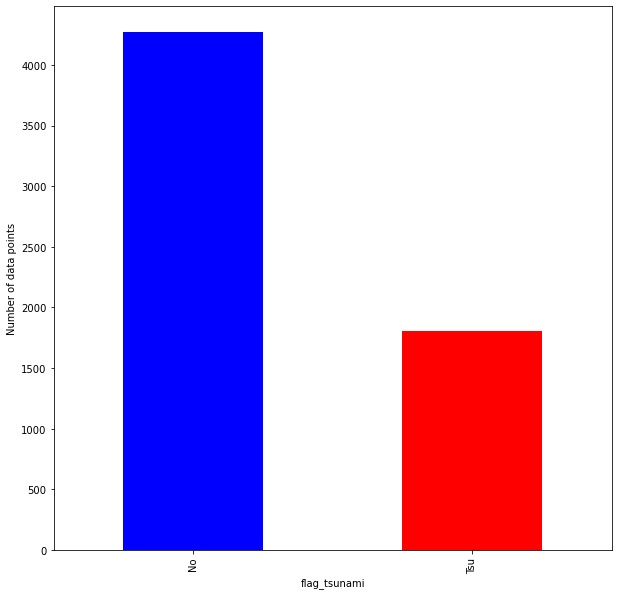

In [22]:
plt.figure(figsize=(10,10))
data.flag_tsunami.value_counts().plot(kind='bar', color=('Blue', 'Red'))
plt.xlabel('flag_tsunami')
plt.ylabel('Number of data points')
plt.show()

<b> Let's establish which variables in our Earthquake dataset are categorical and which are continuous </b>

In [23]:
numeric_variables = data.select_dtypes(include=[np.number])
numeric_variables.columns

Index(['id', 'year', 'month', 'day', 'hour', 'minute', 'second', 'focal_depth',
       'eq_primary', 'eq_mag_mw', 'eq_mag_ms', 'eq_mag_mb', 'intensity',
       'latitude', 'longitude', 'injuries', 'damage_millions_dollars',
       'total_injuries', 'total_damage_millions_dollars'],
      dtype='object')

In [24]:
object_variables = data.select_dtypes(include=[np.object])
object_variables.columns

Index(['flag_tsunami', 'country', 'state', 'location_name', 'region_code',
       'injuries_description', 'damage_description',
       'total_injuries_description', 'total_damage_description'],
      dtype='object')

Find the number of unique values for numeric features

In [25]:
numeric_variables.nunique().sort_values()

intensity                          11
month                              13
hour                               24
day                                32
eq_mag_mb                          47
eq_mag_mw                          54
eq_mag_ms                          55
minute                             60
eq_primary                         64
focal_depth                       197
total_damage_millions_dollars     233
damage_millions_dollars           248
injuries                          338
total_injuries                    344
second                            576
year                              946
latitude                         2885
longitude                        3654
id                               6072
dtype: int64

In [26]:
object_variables.nunique().sort_values()

flag_tsunami                     2
injuries_description             5
damage_description               5
total_injuries_description       5
total_damage_description         5
region_code                     18
state                           29
country                        155
location_name                 3821
dtype: int64

For the numeric variables, we can see that the top nine have significantly fewer unique values than the remaining rows, and it's likely that these are categorical variables. 

For columns with categorical values, it would be useful to see what the unique values (categories) of the feature are, along with what the frequencies of these categories are

In [27]:
counts = data.injuries_description.value_counts(dropna=False)
counts

NA    4723
1      666
3      347
2      193
4      143
Name: injuries_description, dtype: int64

In [28]:
# Sort the values in increasing order of the ordinal variable
counts.reset_index().sort_values(by='index')

,index,injuries_description
1,1,666
3,2,193
2,3,347
4,4,143
0,NA,4723


### Let's plot a pie chart to visualize the distribution of the discrete values of the damage_description variable

In [29]:
counts = data.damage_description.value_counts()
counts = counts.sort_index()

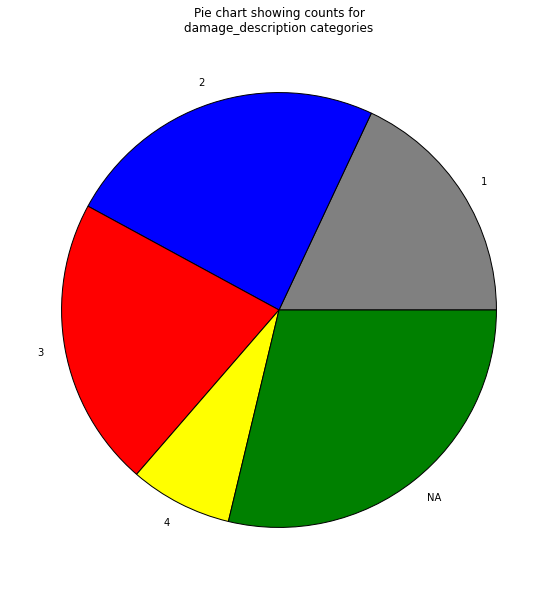

In [30]:
fig, ax = plt.subplots(figsize=(10,10))
slices = ax.pie(counts, 
               labels=counts.index,
               colors=['gray', 'blue', 'red', 'yellow', 'green'],
               wedgeprops={'edgecolor': 'black'} )
plt.title('Pie chart showing counts for\ndamage_description categories')
plt.show()

### Let's plot the histogram for the eq_primary feature using the Seaborn library

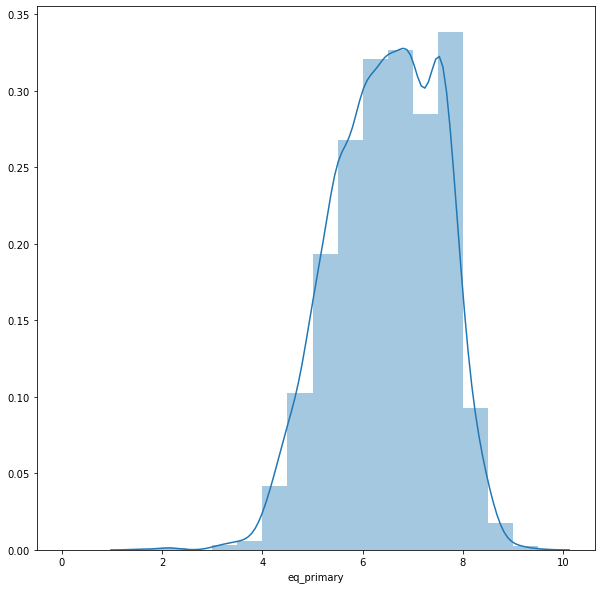

In [31]:
plt.figure(figsize=(10,10))
sns.distplot(data.eq_primary.dropna(), bins=np.linspace(0,10,21))
plt.show()

### Let's calculate the skew and kurtosis values

In [32]:
data.skew().sort_values()

year                             -3.859655
latitude                         -1.038393
region_code                      -0.539048
longitude                        -0.457442
intensity                        -0.442065
eq_primary                       -0.295823
eq_mag_ms                        -0.243581
eq_mag_mb                        -0.058037
month                            -0.012936
day                               0.036121
eq_mag_mw                         0.154842
id                                0.300563
hour                              0.570365
minute                            0.618738
second                            1.096737
focal_depth                       5.866408
total_damage_millions_dollars    13.227907
total_injuries                   22.191856
injuries                         24.428284
damage_millions_dollars          47.532464
dtype: float64

In [33]:
data.kurt()

id                                 -0.866617
year                               19.532730
month                              -1.202962
day                                -1.228782
hour                               -1.132145
minute                             -1.050225
second                             -0.272400
focal_depth                        40.911649
eq_primary                         -0.327067
eq_mag_mw                          -0.593857
eq_mag_ms                          -0.486214
eq_mag_mb                           0.432798
intensity                           0.072622
latitude                            0.384692
longitude                          -0.777352
region_code                        -1.324200
injuries                          672.946635
damage_millions_dollars          2725.970362
total_injuries                    569.624067
total_damage_millions_dollars     202.895621
dtype: float64

### Let's plot a scatter plot between the primary earthquake magnitude and the corresponding number of injuries

In [34]:
# Filter out the null values
data_to_plot = data[~pd.isnull(data.injuries) & ~pd.isnull(data.eq_primary)]

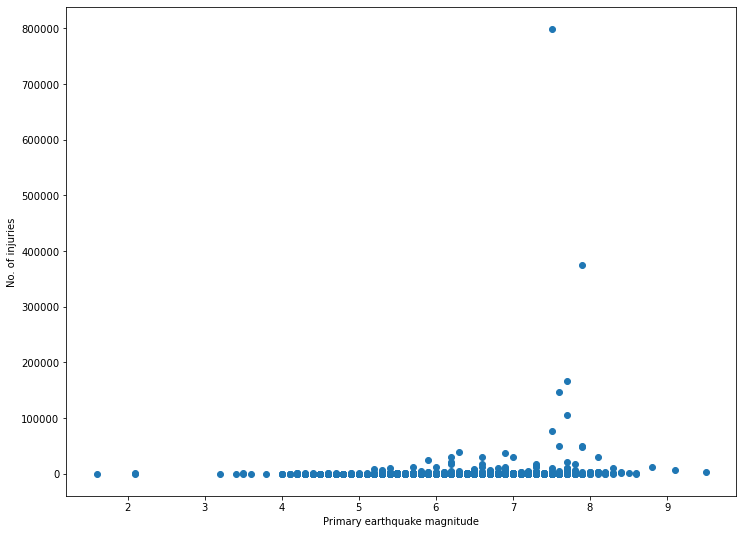

In [35]:
# Create and display the scatter plot
plt.figure(figsize=(12,9))
plt.scatter(x=data_to_plot.eq_primary, y=data_to_plot.injuries)
plt.xlabel('Primary earthquake magnitude')
plt.ylabel('No. of injuries')
plt.show()

### Let's plot a correlation heatmap between all the numeric variables

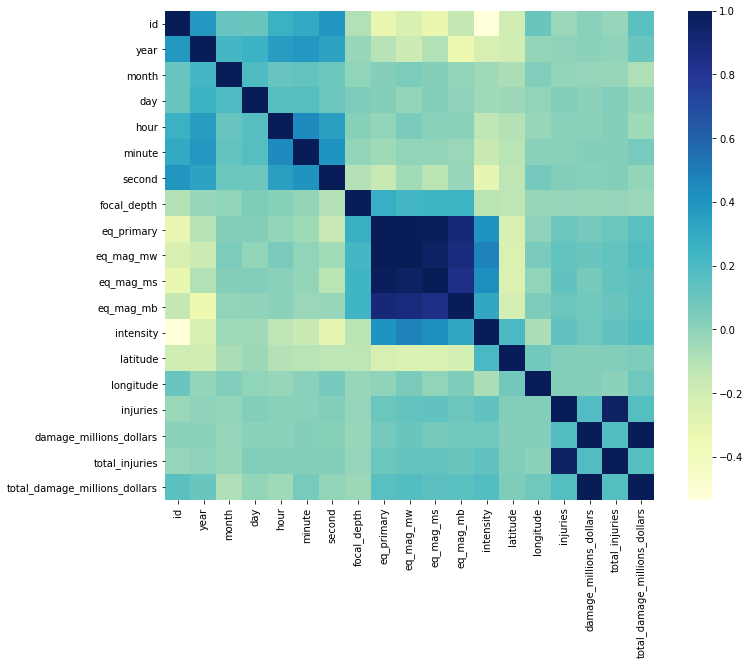

In [36]:
plt.figure(figsize=(12,9))
sns.heatmap(data.corr(), square=True, cmap='YlGnBu')
plt.show()

In [37]:
feature_subset = ['focal_depth', 'eq_primary', 'eq_mag_mw', 'eq_mag_ms', 'eq_mag_mb', 'intensity',
    'latitude', 'longitude', 'injuries', 'damage_millions_dollars',
    'total_injuries', 'total_damage_millions_dollars']

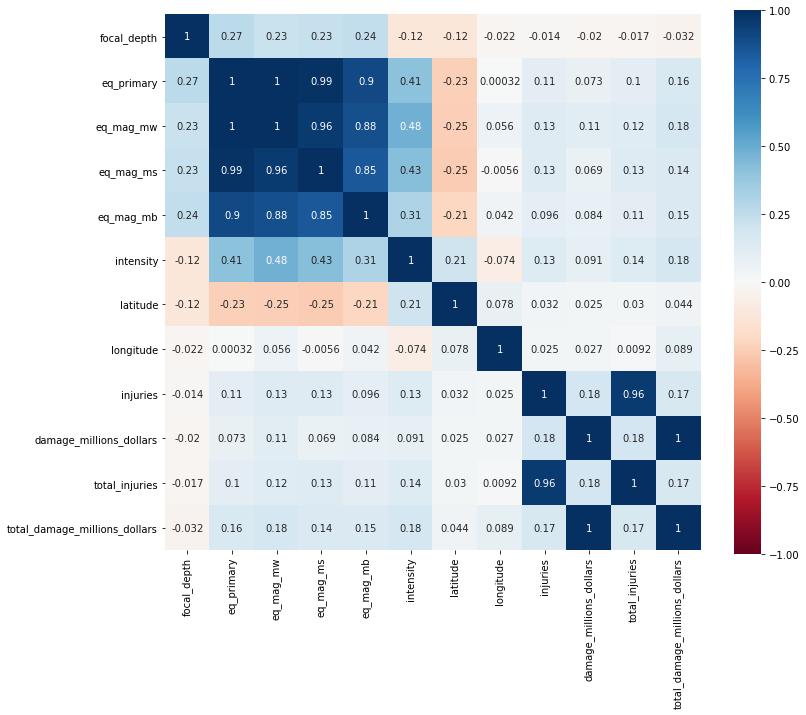

In [38]:
plt.figure(figsize = (12,10))
sns.heatmap(data[feature_subset].corr(), square=True, annot=True, cmap="RdBu", vmin=-1, vmax=1)
plt.show()

### Will look at a pairplot between the features having the highest pairwise correlation in the dataset

In [39]:
# Define a list having the subset of features on which to create the pairplot
feature_subset = ['focal_depth', 'eq_primary', 'eq_mag_mw', 'eq_mag_ms', 'eq_mag_mb', 'intensity']

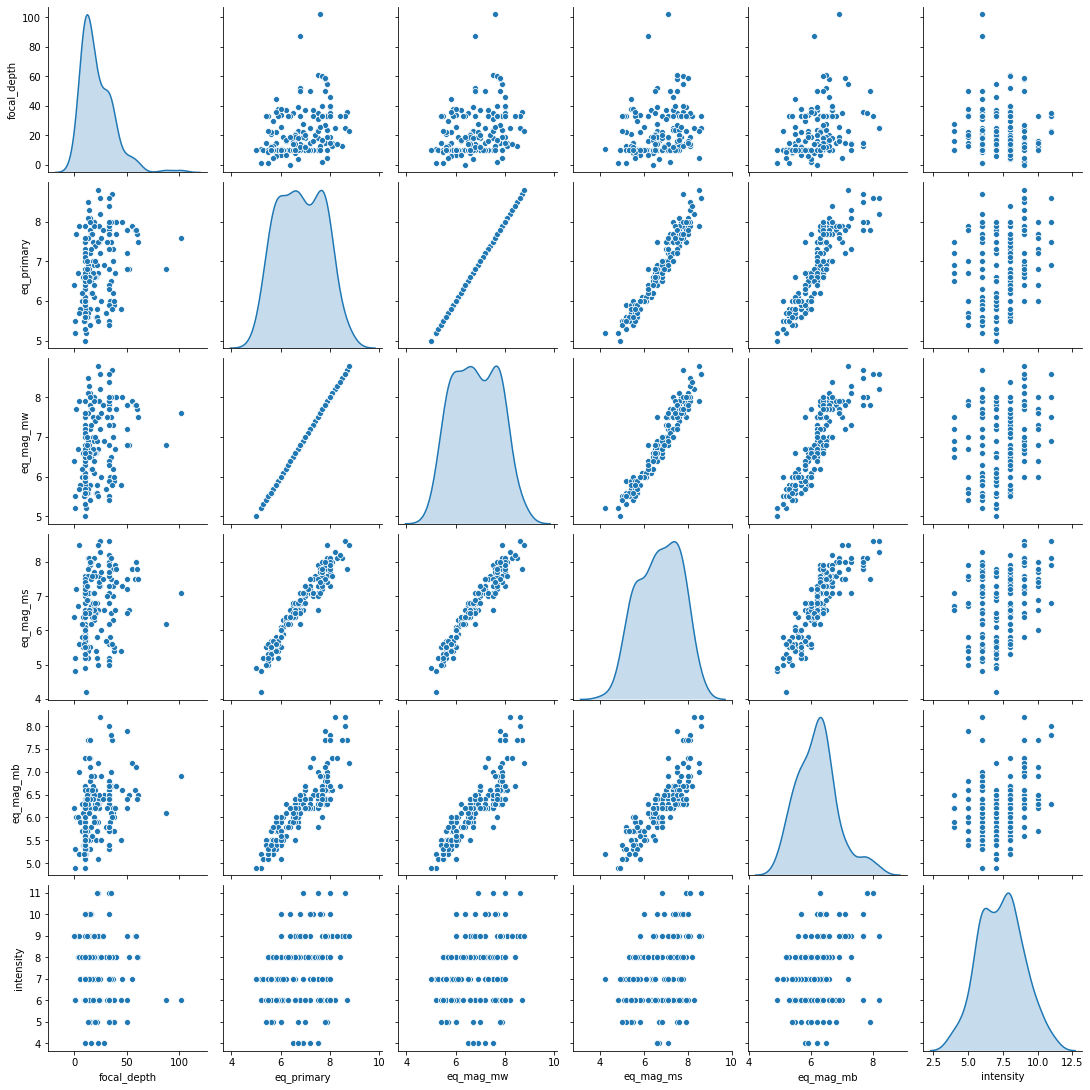

In [40]:
# Create the pairplot using seaborn
sns.pairplot(data[feature_subset].dropna(), kind ='scatter', diag_kind='kde')
plt.show()

### Let's visualize the total number of tsunamis created by earthquakes of each intensity level using a bar chart

In [41]:
# Preprocess the flag_tsunami variable
data.loc[:,'flag_tsunami'] = data.flag_tsunami.apply(lambda t: int(str(t) == 'Tsu'))

In [42]:
# Remove all rows having null intensity values
subset = data[~pd.isnull(data.intensity)][['intensity', 'flag_tsunami']]

In [43]:
# Find the total number of tsunamis for each intensity level
data_to_plot = subset.groupby('intensity').sum()
data_to_plot

,flag_tsunami
intensity,
2.0,0
3.0,8
4.0,19
5.0,38
6.0,63
7.0,91
8.0,119
9.0,132
10.0,130


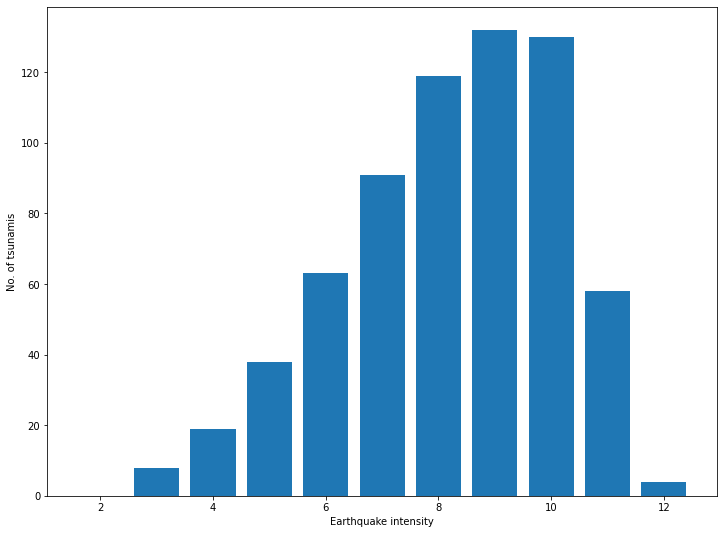

In [44]:
# Plot the bar chart
plt.figure(figsize=(12,9))
plt.bar(x=data_to_plot.index, height=data_to_plot.flag_tsunami)
plt.xlabel('Earthquake intensity')
plt.ylabel('No. of tsunamis')
plt.show()

### will plot a box plot that represents the variation in eq_primary over those countries with at least 100 earthquakes

In [45]:
# Find countries with over 100 earthquakes
country_counts = data.country.value_counts()
top_countries = country_counts[country_counts > 100]
top_countries

CHINA          590
JAPAN          403
INDONESIA      379
IRAN           377
ITALY          325
TURKEY         321
GREECE         260
USA            260
PHILIPPINES    210
MEXICO         198
CHILE          193
PERU           180
RUSSIA         149
Name: country, dtype: int64

In [46]:
# Subset the DataFrame to filter in only those rows having countries in the preceding set
subset = data[data.country.isin(top_countries.index)]

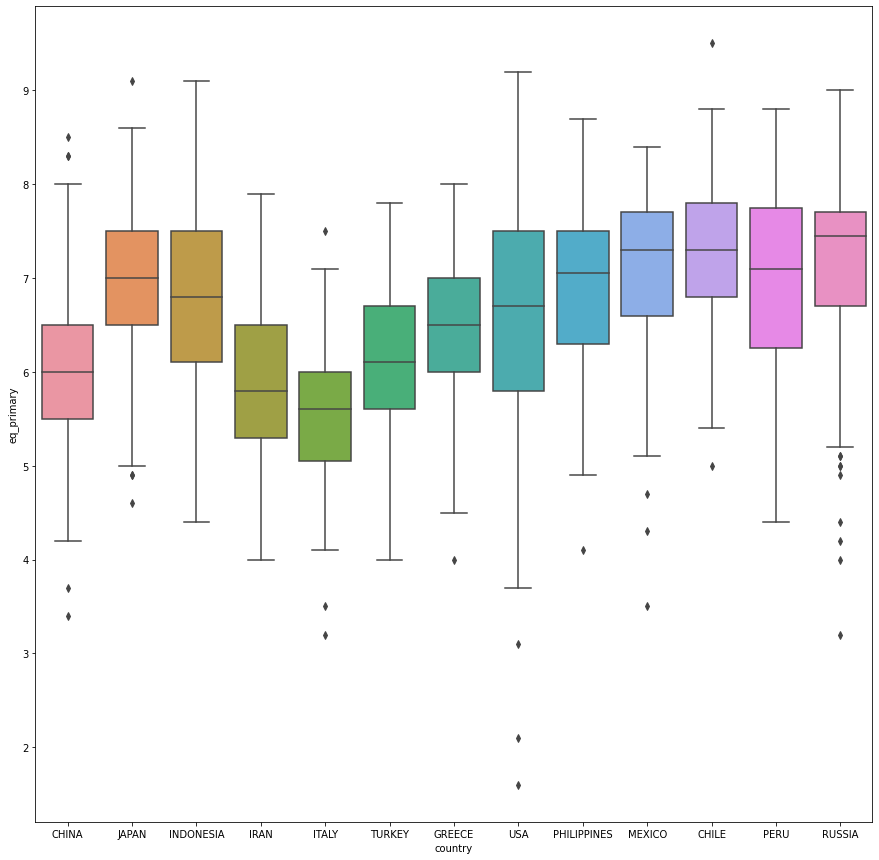

In [47]:
# Create and display the box plot
plt.figure(figsize=(15,15))
sns.boxplot(x='country', y='eq_primary', data=subset, order=top_countries.index)
plt.show()

### will plot a stacked bar chart that represents the number of tsunamis that occurred for each intensity level

In [48]:
# Find the number of data points that fall into each grouped value of intensity and flag_tsunami
grouped_data = data.groupby(['intensity', 'flag_tsunami']).size()
grouped_data

intensity  flag_tsunami
2.0        0                 5
3.0        0                10
           1                 8
4.0        0                37
           1                19
5.0        0                74
           1                38
6.0        0               151
           1                63
7.0        0               342
           1                91
8.0        0               470
           1               119
9.0        0               356
           1               132
10.0       0               494
           1               130
11.0       0                79
           1                58
12.0       0                68
           1                 4
dtype: int64

In [49]:
data_to_plot = grouped_data.unstack()
data_to_plot

flag_tsunami,0,1
intensity,,
2.0,5.0,NaN
3.0,10.0,8.0
4.0,37.0,19.0
5.0,74.0,38.0
6.0,151.0,63.0
7.0,342.0,91.0
8.0,470.0,119.0
9.0,356.0,132.0
10.0,494.0,130.0


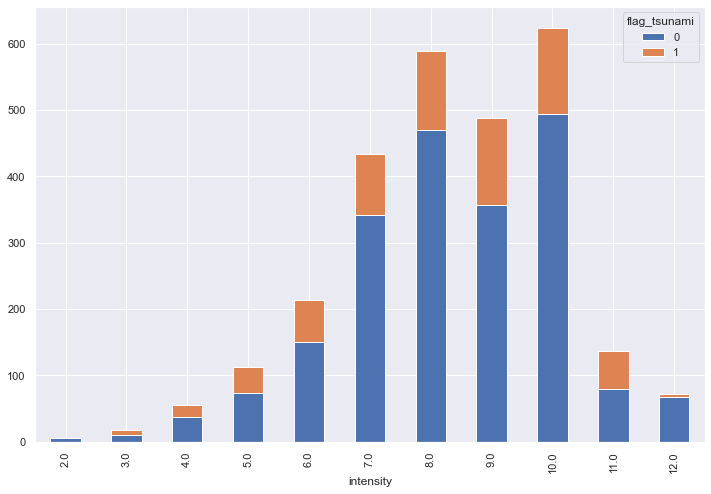

In [50]:
# Create the stacked bar chart
sns.set()
data_to_plot.plot(kind='bar', stacked=True, figsize=(12,8))
plt.show()